In [137]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid


import torch.nn as nn
import torch.nn.functional as F


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.facecolor"] ="#ffffff"

# Explore CIFAR10

In [72]:
# Dowload dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, ".")

Using downloaded and verified file: ./cifar10.tgz


In [73]:
with tarfile.open("./cifar10.tgz", "r:gz") as tar:
    tar.extractall(path="./data")

In [74]:
data_dir = "./data/cifar10/"

In [75]:
print(os.listdir(data_dir))

['test', 'train']


In [76]:
classes = os.listdir(data_dir + "/train")
classes

['automobile',
 'airplane',
 'ship',
 'frog',
 'truck',
 'dog',
 'bird',
 'cat',
 'horse',
 'deer']

In [77]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of training examples for airplanes: ", len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes:  5000
['0763.png', '1503.png', '3790.png', '0593.png', '4059.png']


In [78]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of testing examples for ship: ", len(ship_test_files))
print(ship_test_files[:5])

No. of testing examples for ship:  1000
['0763.png', '0593.png', '0104.png', '0254.png', '0208.png']


In [79]:
# ImageFolder to load image files
dataset = ImageFolder(data_dir + "/train", transform=ToTensor())

In [80]:
img, label = dataset[0]
print(img.shape, label)
# img

torch.Size([3, 32, 32]) 0


In [81]:
# print(f"The dataset shape: [{len(dataset)},{str(tuple(img.shape))}]")
img_shape = " ".join([str(num) for num in list(img.shape)])
print(f"The dataset shape: [{len(dataset)},{img_shape}]")

The dataset shape: [50000,3 32 32]


In [82]:
str(tuple(img.shape))

'(3, 32, 32)'

In [83]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Loading dataset

In [87]:
dataset = ImageFolder(data_dir + "/" + "train", transform=ToTensor())
len(dataset)

50000

In [103]:
def data_loader(data_dir="./data/cifar10", mode='train', cls_inx=0):
    """
    Load the image from the file path, 
    check the image shape,
    plot the image
    """
    dataset = ImageFolder(data_dir + "/" + mode, transform=ToTensor())
    img, label = dataset[cls_inx]
    img_shape = " ".join([str(num) for num in list(img.shape)])
    print(f"The dataset shape: [{len(dataset)},{img_shape}]")
    print(f"Image shape: {img_shape}")
    print("The img: ", dataset.classes[label], " - class ("+str(label)+")")
    plt.imshow(img.permute(1,2,0), cmap="gray")
    plt.show()

The dataset shape: [50000,3 32 32]
Image shape: 3 32 32
The img:  deer  - class (4)


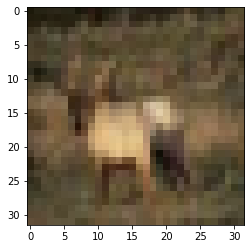

In [106]:
data_loader(cls_inx = 20000)

The dataset shape: [50000,3 32 32]
Image shape: 3 32 32
The img:  truck  - class (9)


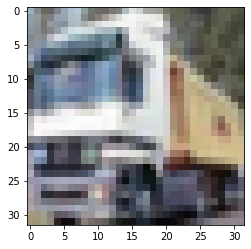

In [108]:
data_loader(cls_inx = 45000)

In [110]:
random_seed = 42
torch.manual_seed(random_seed)

In [111]:
val_size = 5000
train_size = len(dataset) - val_size
print(train_size, val_size)

45000 5000


In [114]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])  # random split the dataset with trian and val
print(len(train_ds), len(val_ds))

45000 5000


In [118]:
batch_size = 128

In [122]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

In [130]:
def show_batch(dataloader):
    for imgs, lbls in dataloader:
        fig, ax = plt.subplots(figsize=(12, 6))
        # configure the x and y axies label to be blank
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(imgs, nrow=16).permute(1,2,0))
        break

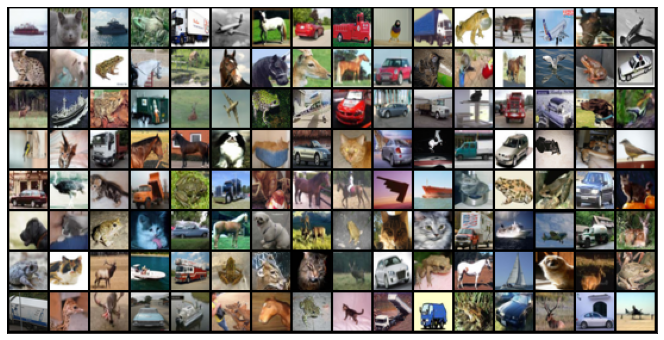

In [131]:
show_batch(train_dl)

In [133]:
def apply_kernel(img, kernel):
    """
    ri - row image
    ci - column image
    rk - row kernel
    ck - column kernel
    ro - row output
    co - column output
    
    formula to compute the shape of output in cnn, where p is the padding, s is the stride step of kernel
    output-row = floor((ri - rk + 2p) /s ) + 1    
    output_col = floor((ci - ck + 2p) /s ) + 1
    
    """
    ri, ci = img.shape
    rk, ck = kernel.shape
    ro, co = ri - rk + 1, ci - ck + 1
    output = torch.zeros([ro, co])
    for i in range(ro):
        """
        convolution computation
        """
        for j in range(co):
            output[i, j] = torch.sum(img[i:i+rk, j:j+ck] * kernel)
    return output

In [136]:
# test of convolution computation
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype = torch.float32)

In [135]:
apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d()
)